In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX

import math

# sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
sys.path.append('/nfshome/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list
     
import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [2]:
dirs = {}

dirs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'

dirs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root'] = '/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/'
 
# dirs['2016-SMS-TChiHZ_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1pb_weighted.root'] = '/mnt/hadoop/store/group/phys_susy/razor/Run2Analysis/SusyEwkHgg/Signal2016/TChiHZ/'
# dirs['2017-SMS-TChiHZ_HToGG_TuneCP2_13TeV-madgraphMLM-pythia8_127_1pb_weighted.root'] = '/mnt/hadoop/store/group/phys_susy/razor/Run2Analysis/SusyEwkHgg/Signal2017/TChiHZ/'

 
out_dir = '/nfshome/jmao/cms-llp/plots/20190925/'

fname = {
    'ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root',
    'ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root',

#     '2016-SMS-TChiHZ_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1pb_weighted.root',
#     '2017-SMS-TChiHZ_HToGG_TuneCP2_13TeV-madgraphMLM-pythia8_127_1pb_weighted.root',
        }

texs = {}

texs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root'] = 'ctau = 10000 mm, H(bb)Z(ll)'
texs['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root'] = 'cms, H(gg)Z'

# texs['2016-SMS-TChiHZ_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1pb_weighted.root'] = 'cms, H(gg)Z'
# texs['2017-SMS-TChiHZ_HToGG_TuneCP2_13TeV-madgraphMLM-pythia8_127_1pb_weighted.root'] = 'cms, H(gg)Z'

cols = {}

 
cols['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root'] = 215
cols['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root'] = 207

# cols['2016-SMS-TChiHZ_HToGG_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_127_1pb_weighted.root'] = 207
# cols['2017-SMS-TChiHZ_HToGG_TuneCP2_13TeV-madgraphMLM-pythia8_127_1pb_weighted.root'] = 207

styles = {}

styles['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root'] = 3
styles['ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root'] = 4

tree = OrderedDict()

f_dir = ''
for file in fname:
    print(dirs[file]+file)
 
    root_dir = uproot.open(dirs[file]+file) 
    tree[file] = root_dir['ntuples/llp']
 
    print ('Open ready')
    print(texs[file])
    print ('Tree ready') 
    print(tree[file], tree)

/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root
Open ready
cms, H(gg)Z
Tree ready
<TTree b'llp' at 0x7f5e14d64f60> OrderedDict([('ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root', <TTree b'llp' at 0x7f5e14d64f60>)])
/mnt/hadoop/store/group/phys_exotica/jmao/aodsim/RunIISummer16/delphes_output/ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root
Open ready
ctau = 10000 mm, H(bb)Z(ll)
Tree ready
<TTree b'llp' at 0x7f5e110bda58> OrderedDict([('ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root', <TTree b'llp' at 0x7f5e14d64f60>), ('ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root', <TTree b'llp' at 0x7f5e110bda58>)])


# LHE Comments  --- Higgs Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root <TTree b'llp' at 0x7f5e14d64f60>
['TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325']
[ 27.703516 136.49928  109.485176 147.875    138.78917  108.65725
  78.39104  234.29413   97.24581   89.05872 ]
[[480.23105 480.23105 471.42874 ... 47.517067 3.551586 47.517067] [392.80298 392.80298 399.93515 ... 0.1964844 0.044018842 0.23463517] [115.76393 73.77487 189.53021 ... 0.269887 0.04613648 0.2538143] ... [192.64436 192.64436 205.11171 ... 0.92490715 0.874111 1.023402] [364.02747 364.02747 344.38022 ... 4.1264496 6.4948063 0.55819863] [599.70026 599.70026 609.17596 ... 1.1910579 0.14061917 0.5377479]]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root <TTree b'llp' at 0x7f5e110bda58>
['TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToL

Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190925/lhe_h_pt.png has been created


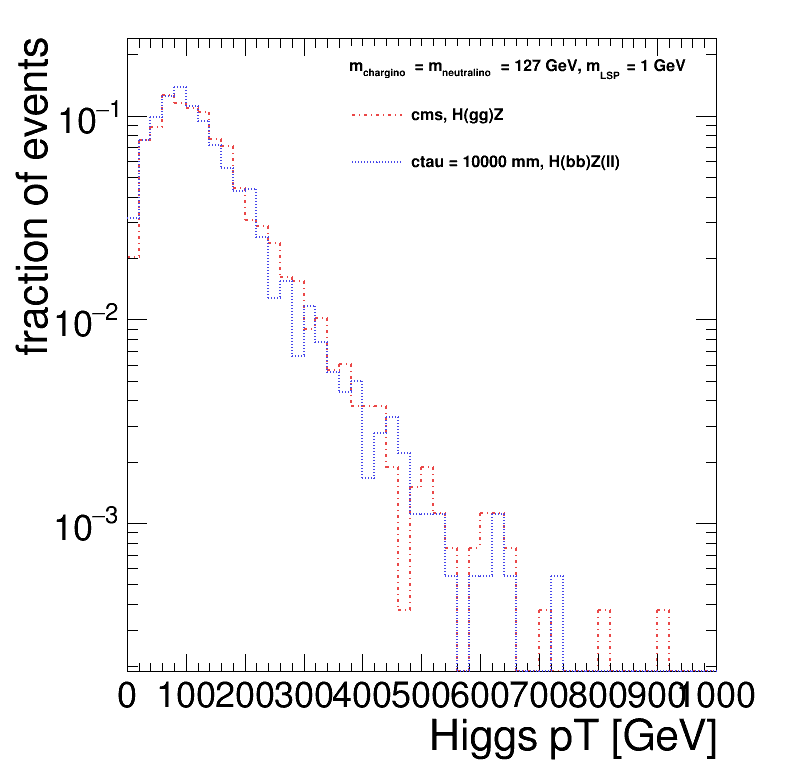

In [3]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    

    
    
    if 'cms' in k:
        
        #branches
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        lhe = v['lheComments'].array()

        basic_str = np.logical_and(pid==25, status==22)


        tags = []

        for i,x in enumerate(lhe):
            cfg = str(x, 'utf-8')
            tags.append(cfg)

        tags = np.array(tags)
        
        print(tags[:10])
    
        # variables
    
        lhe_str = np.logical_and(1,  tags=='TChiHZ_HToGG_127')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]
        
        #plotting

        h_pt_all = h_pt.flatten()

        print(h_pt_all[:10])
        print(pt[:10])

        ht[k] = create_TH1D( h_pt_all, axis_title=['Higgs pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        ht[k].SetLineStyle(styles[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], texs[k])

        i += 1


    elif 'aod' in k:
        
        #branches
    
        pid = v['gParticleId'].array()
        status = v['gParticleStatus'].array()
        pt = v['gParticlePt'].array()
        lhe = v['lheComments'].array()

        basic_str = np.logical_and(pid==25, status==22)


        tags = []

        for i,x in enumerate(lhe):
            cfg = str(x, 'utf-8')
            tags.append(cfg)

        tags = np.array(tags)
    
        print(tags[:10])
        print(pt[:10])
    
        # variables
        
        h_pt = pt[basic_str]
        
        #plotting

        h_pt_all = h_pt.flatten()

        print(h_pt_all[:10])

        ht[k] = create_TH1D( h_pt_all, axis_title=['Higgs pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
        ht[k].SetLineStyle(styles[k])
        ht[k].SetLineColor(cols[k])
        ht[k].SetMarkerColor(cols[k])

        ht[k].DrawNormalized('same')

        leg.AddEntry(ht[k], texs[k])

        i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_h_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root <TTree b'llp' at 0x7f73900ac5f8>
['TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325']
[ 27.703516 136.49928  109.485176 147.875    138.78917  108.65725
  78.39104  234.29413   97.24581   89.05872 ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root <TTree b'llp' at 0x7f739629de80>
['TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000']
[ 95.21648  125.1529   119.91254  131.16487  164.68887   47.652397
  65.88588   46.72453  243.26215   78.58935 ]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


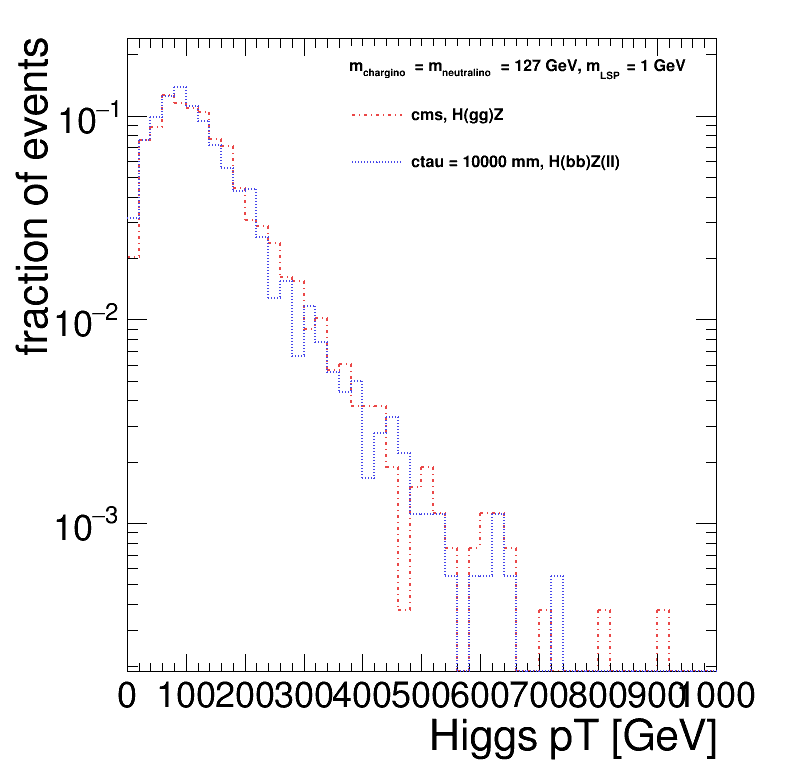

In [38]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==25, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHZ_HToGG_127')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])

    ht[k] = create_TH1D( h_pt_all, axis_title=['Higgs pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
# c.SaveAs(out_dir+'lhe_h_pt.png')

# LHE Comments --- MET

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root <TTree b'llp' at 0x7f73900ac5f8>
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root <TTree b'llp' at 0x7f739629de80>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190925/met.png has been created


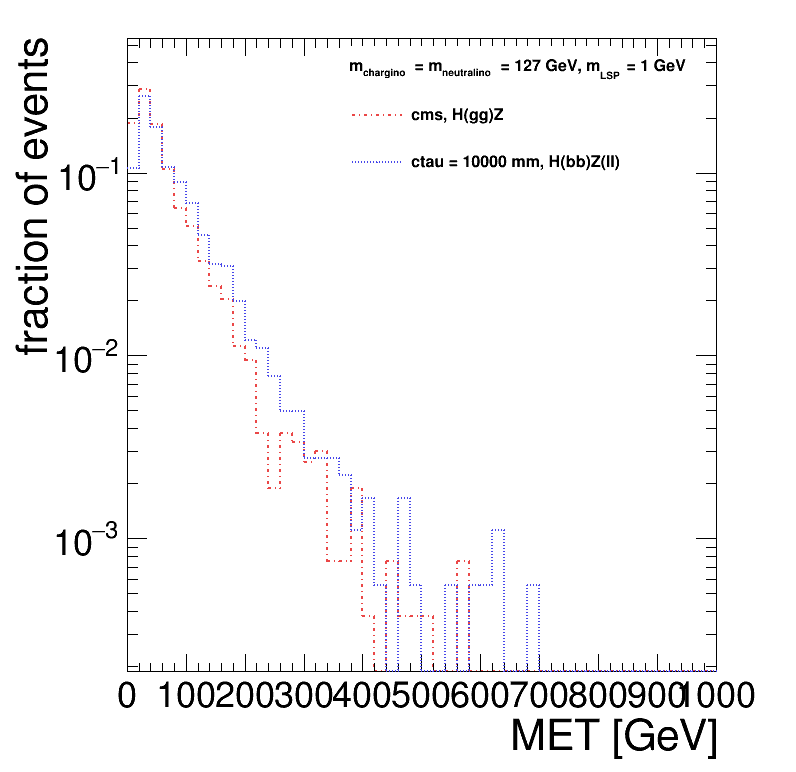

In [28]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches
    
    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()
    met = v['genMetPtCalo'].array()
    

    tags = []
    
    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)
        
    tags = np.array(tags)
    
    # variables
    
    if 'cms' in k:
    
        lhe_str = np.logical_and(1,  tags=='TChiHZ_HToGG_127')
    
        met = met[lhe_str]

        
    #plotting


    ht[k] = create_TH1D( met, axis_title=['MET [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'met.png')

# LHE Comments --- N2 Pt

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root <TTree b'llp' at 0x7f73900ac5f8>
['TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325']
[ 48.618504 140.35904  112.60282  150.36261  134.50008  119.58355
 115.04439  239.55586  122.4558    90.86157 ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root <TTree b'llp' at 0x7f739629de80>
['TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000']
[101.58552  139.92828   66.28203  135.57088  163.01526   54.137745
  75.737885  45.1874   264.25153   82.044426]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190925/lhe_n2_pt.png has been created


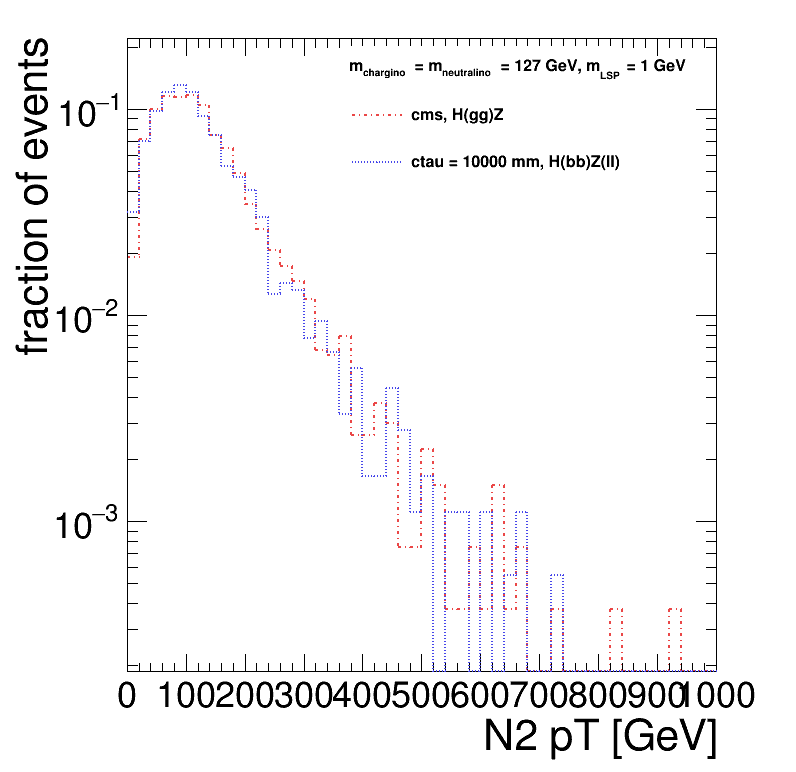

In [40]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000023, status==22)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHZ_HToGG_127')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])

    ht[k] = create_TH1D( h_pt_all, axis_title=['N2 pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_n2_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root <TTree b'llp' at 0x7f73900ac5f8>
['TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325']
[1.2040035  1.9300554  0.76670337 0.7871348  2.1398716  3.6744816
 1.6257724  3.911194   0.13553806 0.7942718 ]
[ 0.02239646  0.04141487  0.04447724 ... 15.500931   17.929762
 19.36172   ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root <TTree b'llp' at 0x7f739629de80>
['TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000']
[ 5.57038    7.0622     1.2359469  6.8569117  1.9162183  6.5647564
  3.1219358  5.74993

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190925/lhe_n1_from_n2_pt.png has been created


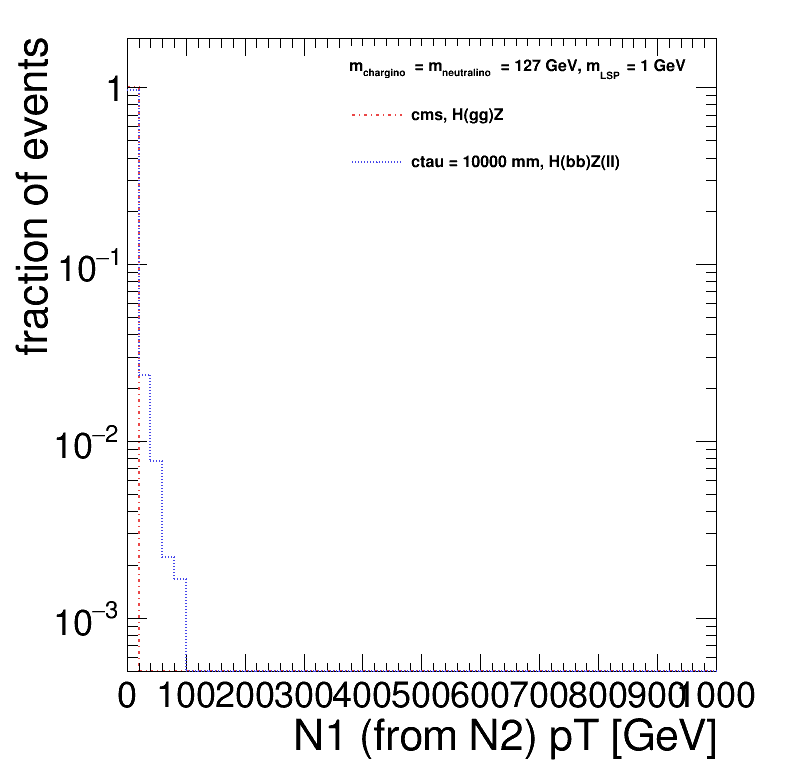

In [43]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000022, mid==1000023)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHZ_HToGG_127')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])
    print(np.unique(h_pt_all))

    ht[k] = create_TH1D( h_pt_all, axis_title=['N1 (from N2) pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_n1_from_n2_pt.png')

ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_cms_lhe.root <TTree b'llp' at 0x7f73900ac5f8>
['TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325' 'TChiHZ_HToGG_325'
 'TChiHZ_HToGG_325']
[ 34.226517  14.367857  55.182114  32.474964  61.87359   21.852503
  36.4727   118.63291   73.4354    51.96687 ]
ntuple_RunIISummer16_SUS-RunIIFall17FSPremix-00057_TCHI_HZ_V2_aod_lhe.root <TTree b'llp' at 0x7f739629de80>
['TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000'
 'TChiHZ_ZToLL_HToBB_127_10000' 'TChiHZ_ZToLL_HToBB_127_10000']
[12.623157  22.419992  37.297245  74.964096  40.927643  15.53596
  6.7480702 30.856447  41.46544   41.509396 ]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190925/lhe_n1_from_n3_pt.png has been created


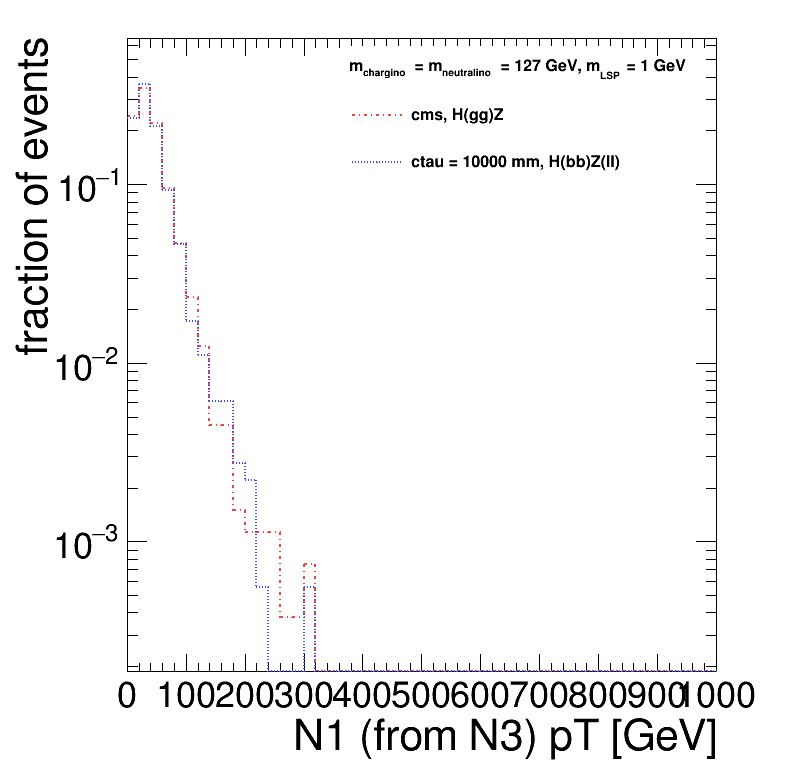

In [42]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.43,0.76,0.78,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0
ht = {}

# print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    #branches

    pid = v['gParticleId'].array()
    mid = v['gParticleMotherId'].array()
    status = v['gParticleStatus'].array()
    pt = v['gParticlePt'].array()
    lhe = v['lheComments'].array()

    basic_str = np.logical_and(pid==1000022, mid==1000025)


    tags = []

    for i,x in enumerate(lhe):
        cfg = str(x, 'utf-8')
        tags.append(cfg)

    tags = np.array(tags)

    print(tags[:10])

    # variables
    
    
    if 'cms' in k:  
    
        lhe_str = np.logical_and(1,  tags=='TChiHZ_HToGG_127')
        cut_str = np.logical_and(lhe_str, basic_str)
    
        h_pt = pt[cut_str]


    elif 'aod' in k:
        

        h_pt = pt[basic_str]
        
    #plotting

    h_pt_all = h_pt.flatten()

    print(h_pt_all[:10])

    ht[k] = create_TH1D( h_pt_all, axis_title=['N1 (from N3) pT [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht[k].SetLineStyle(styles[k])
    ht[k].SetLineColor(cols[k])
    ht[k].SetMarkerColor(cols[k])

    ht[k].DrawNormalized('same')

    leg.AddEntry(ht[k], texs[k])

    i += 1

leg.SetHeader('m_{chargino} = m_{neutralino} = 127 GeV, m_{LSP} = 1 GeV')
leg.Draw()

c.SetLogy()
c.SetRightMargin(0.1)
c.Update()
c.Draw()
c.SaveAs(out_dir+'lhe_n1_from_n3_pt.png')